In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.datasets import make_imbalance
from imblearn.over_sampling import SMOTE

#import scipy.stats as stats
#import pandas_profiling as pdpf

# Part One | Project Based

### 1. Import and warehouse data:

• Import all the given datasets and explore shape and size of each.

• Merge all datasets onto one and explore final shape and size.

In [2]:
# Importing all the given datasets.
d1=pd.read_csv('Part1 - Normal.csv')
d2=pd.read_csv('Part1 - Type_H.csv')
d3=pd.read_csv('Part1 - Type_S.csv')

In [3]:
# Shape and Size of each dataset.
print('Shape of the dataset named "Part1 - Normal" is = '+str(d1.shape))
print('Size of the dataset named "Part1 - Normal" is = '+str(d1.size)+"\n")

print('Shape of the dataset named "Part1 - Type_H" is = '+str(d2.shape))
print('Size of the dataset named "Part1 - Type_H" is = '+str(d2.size)+"\n")

print('Shape of the dataset named "Part1 - Type_S" is = '+str(d3.shape))
print('Size of the dataset named "Part1 - Type_S" is = '+str(d3.size))

Shape of the dataset named "Part1 - Normal" is = (100, 7)
Size of the dataset named "Part1 - Normal" is = 700

Shape of the dataset named "Part1 - Type_H" is = (60, 7)
Size of the dataset named "Part1 - Type_H" is = 420

Shape of the dataset named "Part1 - Type_S" is = (150, 7)
Size of the dataset named "Part1 - Type_S" is = 1050


In [4]:
# Merging all datasets onto one.
dres=pd.concat([d1,d2,d3])
dres=dres.reset_index(drop=True)     # Resetting the index values.

In [5]:
# Exploring the shape and size of the resultant final dataset "dres".
print('Shape of the final dataset is = '+str(dres.shape))
print('Size of the final dataset is = '+str(dres.size))

Shape of the final dataset is = (310, 7)
Size of the final dataset is = 2170


### 2. Data cleansing:

• Explore and if required correct the datatypes of each attribute

• Explore for null values in the attributes and if required drop or impute values.

In [6]:
#Explore and if required correct the datatypes of each attribute.
dres.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [7]:
dres.tail()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S
309,48.259920,16.417462,36.329137,31.842457,94.882336,28.343799,Type_S


In [8]:
dres.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [9]:
dres["Class"] = dres.Class.astype('category')

In [10]:
dres.dtypes

P_incidence     float64
P_tilt          float64
L_angle         float64
S_slope         float64
P_radius        float64
S_Degree        float64
Class          category
dtype: object

In [11]:
dres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   P_incidence  310 non-null    float64 
 1   P_tilt       310 non-null    float64 
 2   L_angle      310 non-null    float64 
 3   S_slope      310 non-null    float64 
 4   P_radius     310 non-null    float64 
 5   S_Degree     310 non-null    float64 
 6   Class        310 non-null    category
dtypes: category(1), float64(6)
memory usage: 15.2 KB


In [12]:
# Unique entries of the column "Class".
dres.Class.unique()

['Normal', 'Nrmal', 'Type_H', 'type_h', 'Type_S', 'tp_s']
Categories (6, object): ['Normal', 'Nrmal', 'Type_H', 'type_h', 'Type_S', 'tp_s']

In [13]:
#Correcting values of Class attribute with required labels.
dres["Class"].replace({"Nrmal":"Normal","type_h":"Type_H","tp_s":"Type_S"}, inplace=True)
dres["Class"] = dres.Class.astype('category')

dres.Class.unique()

['Normal', 'Type_H', 'Type_S']
Categories (3, object): ['Normal', 'Type_H', 'Type_S']

In [14]:
#Export final csv file.
#dres.to_csv('Part1.csv', index=False)

In [15]:
# Explore for null values in the attributes and if required drop or impute values.
dres.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

### 3. Data analysis & visualisation:

• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each
analysis.

In [16]:
#Perform detailed statistical analysis on the data.
dres.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


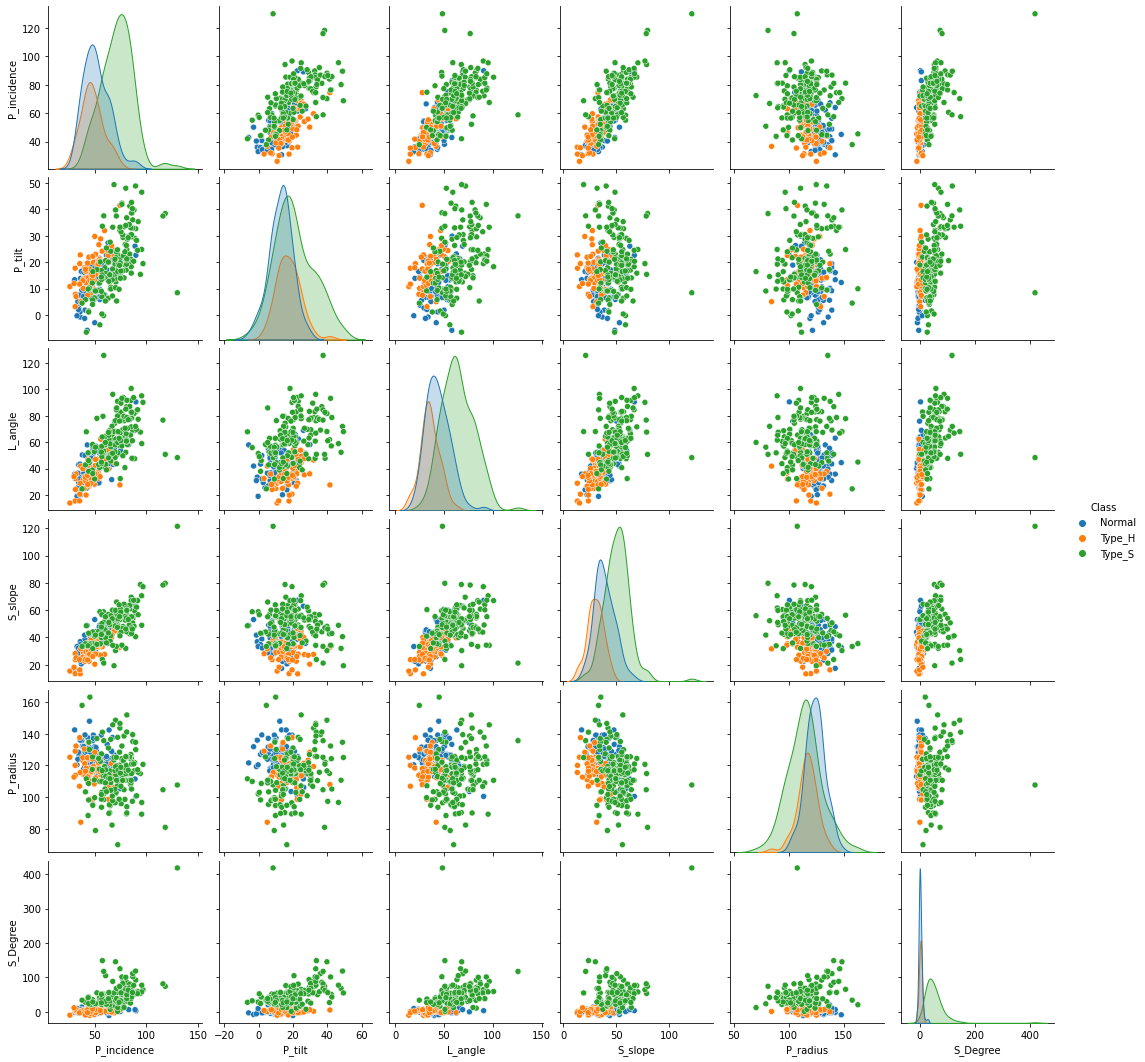

In [17]:
#Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.
sns.pairplot(dres, diag_kind='kde', hue="Class")

# The pair plot concludes the order of significance in decreasing order as follows: Type_S (The Green dots), Normal (The Blue dots) & Type_H (The Orange dots)
# This suggests that in terms of the amount of data for each given Class we do not have uniformity on the number of data poitns collected.
# It would have been better if the number of data points collected for each type would have been nearly equal which would have contributed to the analysis in equal proportions resulting in an ubiased analysis.

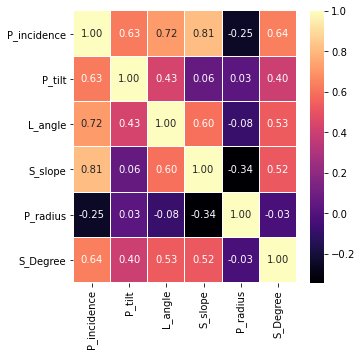

In [18]:
fig,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(dres.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

# The correlation heatmap for the three classes combined together gives us a good estimate so as to how much the given varibles are correlated.
# This heatmap can not help us differentiate the Class, instead it helps us understand the degree of correlation between the given variables, which for us is important so as to visualize what these variables might represent clinically from a physician's point of view. This in turn can help us segregate the Classes on further and deeper analysis of the data.

Further, there is a need to visualize the degree of dependence of these variables on one another keeping in mind the particular class they belong to, for every given Class.

The Pair Plots with correlation heatmaps of each class are plotted below for better analysis of being able to understand the analogy for a given set of data points to belong to a particular given Class.

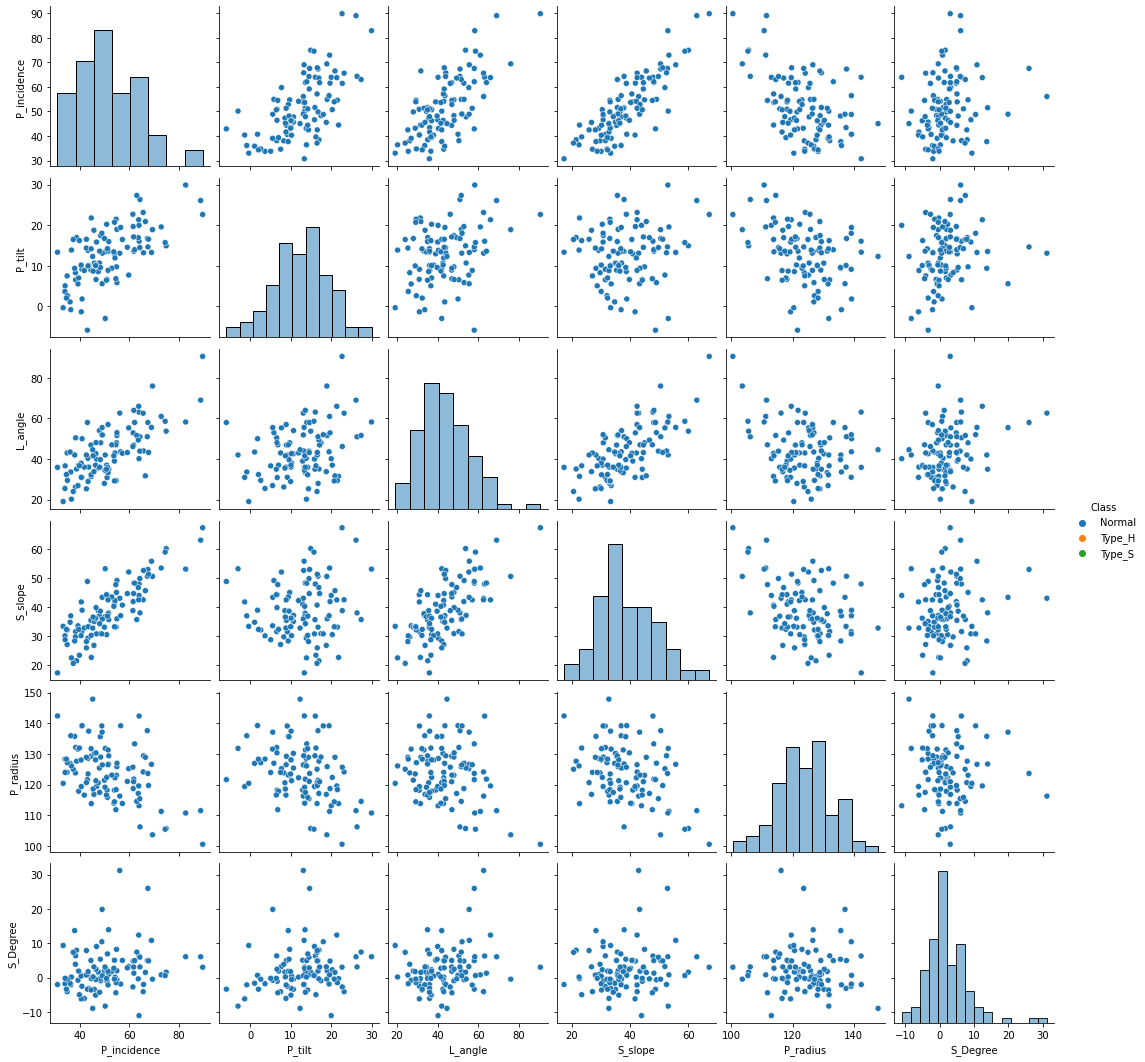

In [19]:
# Pair Plot for "Normal" Class.

sns.pairplot(dres.loc[dres["Class"] == "Normal"], diag_kind='hist', hue="Class")

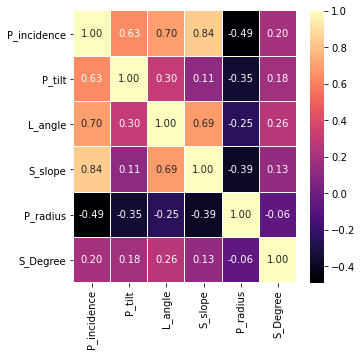

In [20]:
# Correlation Heatmap for "Normal" Class.

fig,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(dres.loc[dres["Class"] == "Normal"].corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

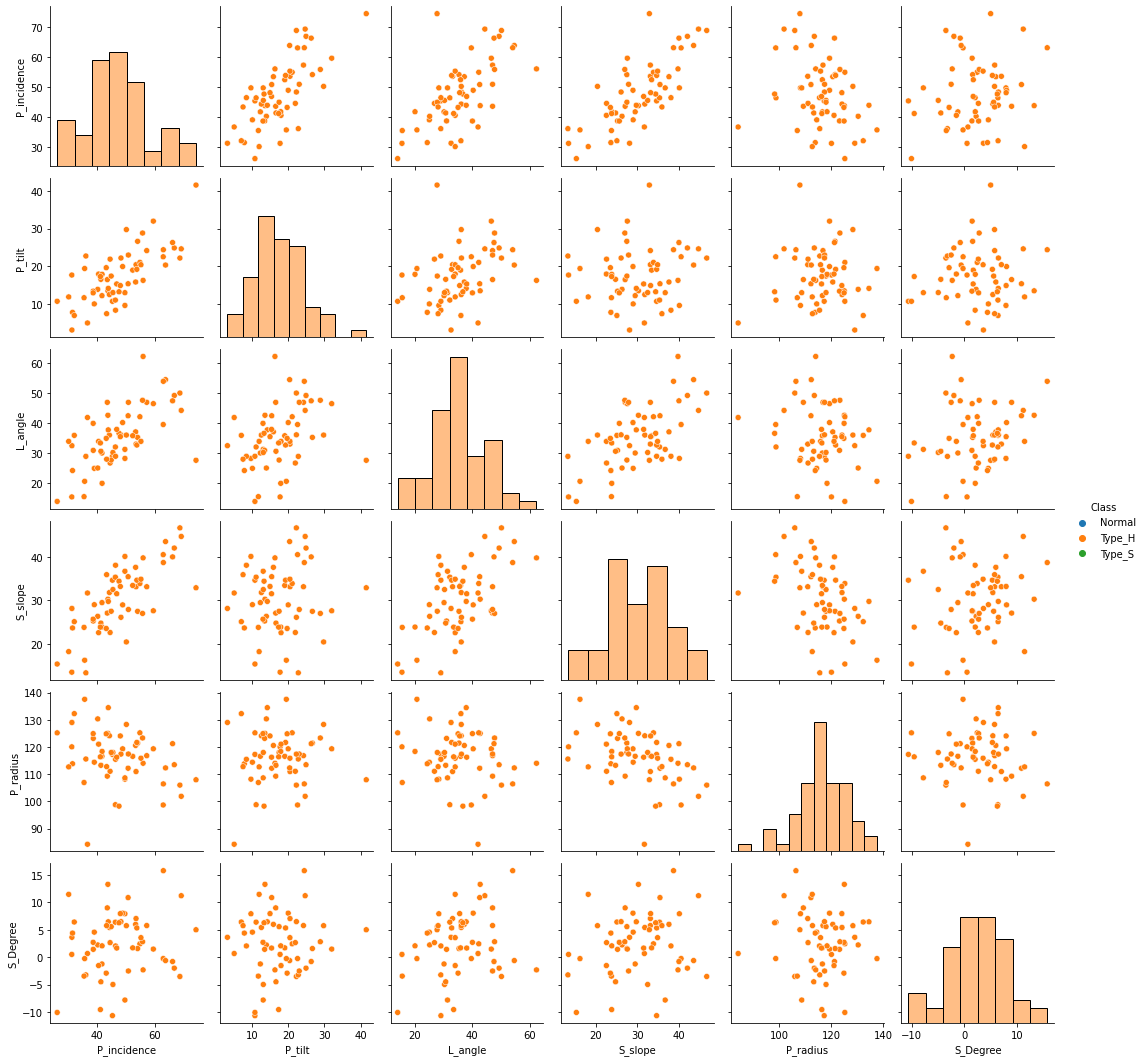

In [21]:
# Pair Plot for "Type_H" Class.

sns.pairplot(dres.loc[dres["Class"] == "Type_H"], diag_kind='hist', hue="Class")

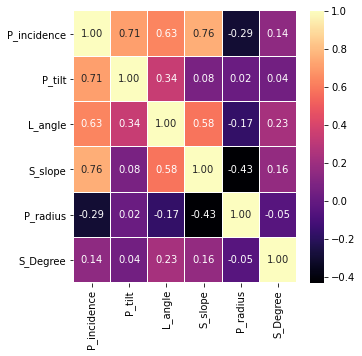

In [22]:
# Correlation Heatmap for "Type_H" Class.

fig,ax = plt.subplots(figsize=(5, 5))   
sns.heatmap(dres.loc[dres["Class"] == "Type_H"].corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

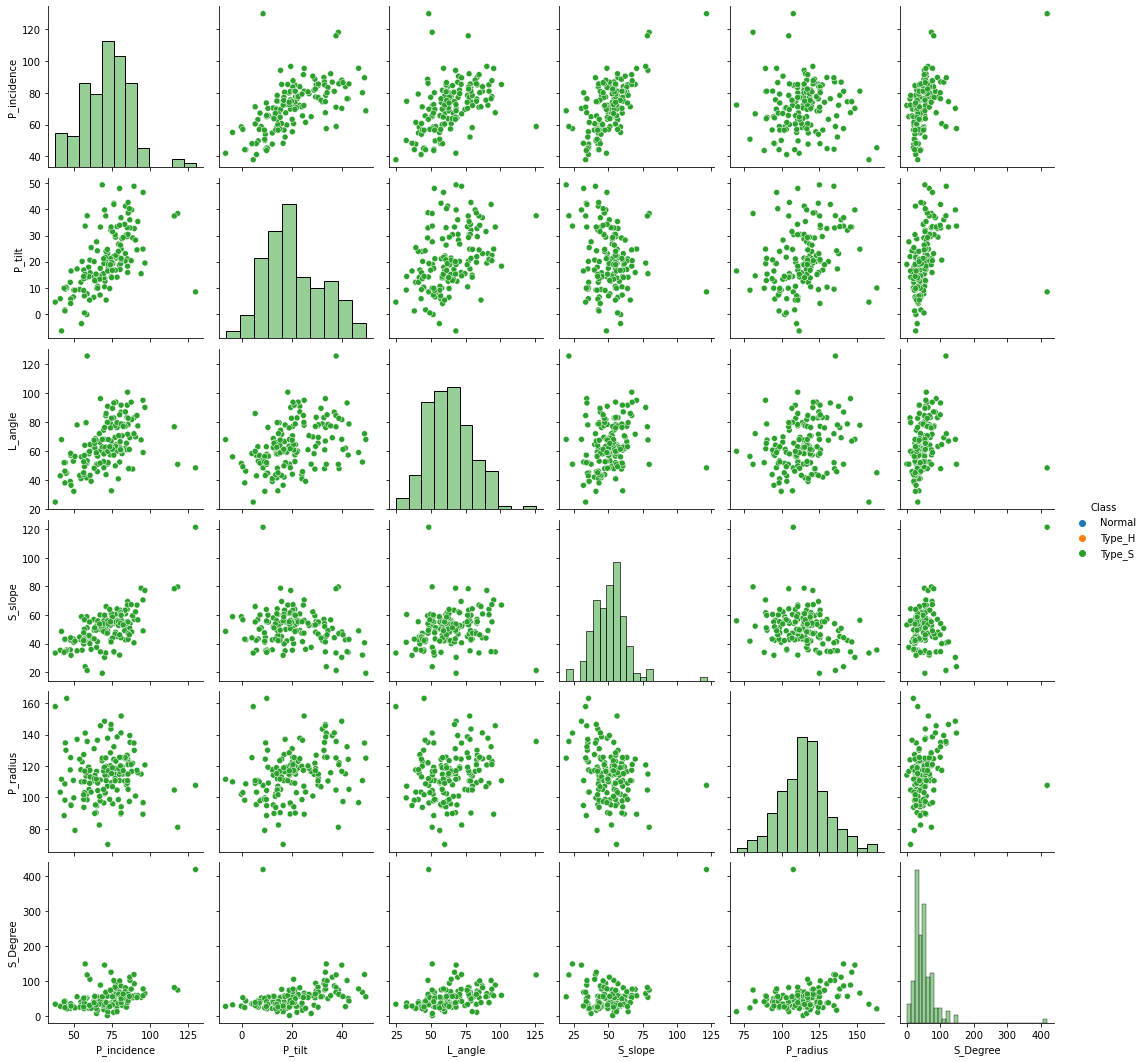

In [23]:
# Pair Plot for "Type_S" Class.

sns.pairplot(dres.loc[dres["Class"] == "Type_S"], diag_kind='hist', hue="Class")

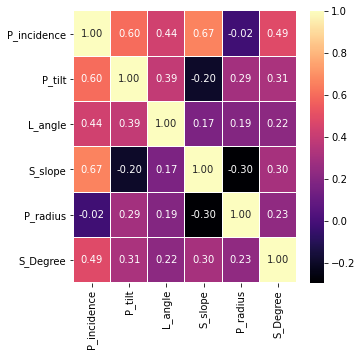

In [24]:
# Correlation Heatmap for "Type_S" Class.

fig,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(dres.loc[dres["Class"] == "Type_S"].corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

### 4. Data pre-processing:

• Segregate predictors vs target attributes.

• Perform normalisation or scaling if required.

• Check for target balancing. Add your comments.

• Perform train-test split.

In [25]:
# Segregate predictors vs target attributes.

X = dres.drop(labels= "Class" , axis = 1)      # X is predictors.
y = dres["Class"]                              # y is target.

print("Predictor Attributes with first five rows:\n")
print(str(X.head())+"\n\n\n")


print("Target Attributes  with first five rows:\n")
print(y.head())

Predictor Attributes with first five rows:

   P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910



Target Attributes  with first five rows:

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: Class, dtype: category
Categories (3, object): ['Normal', 'Type_H', 'Type_S']


In [26]:
# Perform normalisation or scaling if required.


# Convert the features into z scores as we do not know what units / scales were used.
# It is always adviced to scale numeric attributes in models that calculate distances.

XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,1.042177e-16,2.096889e-16,1.980495e-16,2.829278e-17,-5.071212e-16,-1.277204e-16
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01


In [28]:
# Check for target balancing. Add your comments.

y.unique()       # Target balancing for attribute named Class was already done in the data cleansing part. We now have three required labels in a decent ratio of 10:6:15 for "Normal", "Type_H" & "Type_S" respectively which is evident from the shapes of the original datasets.
                 # This is crucial for training a classifier since different labelling for same set of datapoints won't help the classifier during the training, instead will mislead it from predicting accurately because of increased variability and a strong decline in the number of datapoints per Class.

['Normal', 'Type_H', 'Type_S']
Categories (3, object): ['Normal', 'Type_H', 'Type_S']

In [29]:
# Perform train-test split.

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)       # train:test = 7:3

### 5. Model training, testing and tuning:

• Design and train a KNN classifier.

• Display the classification accuracies for train and test data.

• Display and explain the classification report in detail.

• Automate the task of finding best values of K for KNN.

• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained
model with your comments for selecting this model.

In [30]:
# Design and train a KNN classifier.

NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [31]:
# Display the classification accuracies for train and test data.


# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will be assigned to the test data point.

predicted_labels = NNH.predict(X_train)
print("Classification accuracy for train data = "+str(NNH.score(X_train, y_train))+"\n")    # Classification accuracy for train data.

predicted_labels = NNH.predict(X_test)
print("Classification accuracy for test data = "+str(NNH.score(X_test, y_test)))            # Classification accuracy for test data.

Classification accuracy for train data = 1.0

Classification accuracy for test data = 0.7526881720430108


Confusion Matrix


<AxesSubplot:>

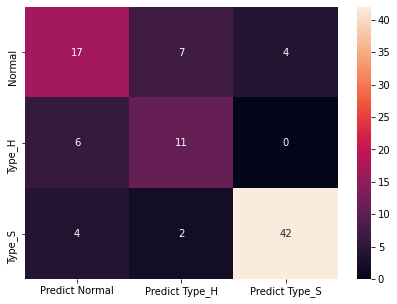

In [32]:
# Display and explain the classification report in detail.

# The diagonal containing 17, 11 & 42 are correctly classified or predicted, which accounts for nearly 75.26% of the total data points. Total number of data points can be calculated by adding all the numbers present in the confusion matrix.
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=["Normal","Type_H","Type_S"])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["Predict Normal","Predict Type_H","Predict Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

     k     Score
20  21  0.806452


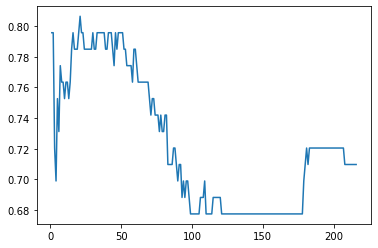

In [33]:
# Automate the task of finding best values of K for KNN.


# 217 is the maximum value k can hold since maximum number of data points present in the training set is 70% of 310, which is 217.

scores =[]
for k in range(1,217):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

plt.plot(range(1,217),scores)

koptimum = pd.DataFrame(list(zip(range(1,217), scores)), columns =['k', 'Score'])


k_opt=koptimum.loc[koptimum["Score"] == max(koptimum["Score"])]
print(k_opt)

Therefore, maximum score or maximum classification accuracy is 80.64% approximately which corresponds to the value of k equals 21.

In [34]:
# Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model.
NNH = KNeighborsClassifier(n_neighbors= 21 , weights = 'distance' )
NNH.fit(X_train, y_train)

predicted_labels = NNH.predict(X_train)
print("Classification accuracy for train data = "+str(NNH.score(X_train, y_train))+"\n")

predicted_labels = NNH.predict(X_test)
print("Classification accuracy for test data = "+str(NNH.score(X_test, y_test)))


Classification accuracy for train data = 1.0

Classification accuracy for test data = 0.8064516129032258


This is the best trained model for 70/30 split in train/test data with k=21 giving the highest possible classification accuracy score of 80.64% approx. on test data but since it overfits the train data and there is a sgnificant difference in classification accuracies, I would prefer not choosing it.

**Therefore, we must train the classifier with different parameters that does not overfit the data. This is done below.**

     k     Score
23  24  0.806452
27  28  0.806452
29  30  0.806452


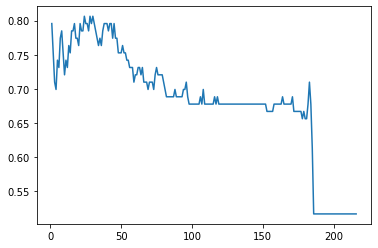

In [35]:
# Finding the optimum value of k for weights='uniform'.

scores =[]
for k in range(1,217):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'uniform' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

plt.plot(range(1,217),scores)

koptimum = pd.DataFrame(list(zip(range(1,217), scores)), columns =['k', 'Score'])


k_opt=koptimum.loc[koptimum["Score"] == max(koptimum["Score"])]
print(k_opt)

In [36]:
# For k=24 weights='uniform'

NNH = KNeighborsClassifier(n_neighbors= 24 , weights = 'uniform' )
NNH.fit(X_train, y_train)

predicted_labels = NNH.predict(X_train)
print("Classification accuracy for train data = "+str(NNH.score(X_train, y_train))+"\n")

predicted_labels = NNH.predict(X_test)
print("Classification accuracy for test data = "+str(NNH.score(X_test, y_test)))

Classification accuracy for train data = 0.8064516129032258

Classification accuracy for test data = 0.8064516129032258


In [37]:
# For k=28 weights='uniform'

NNH = KNeighborsClassifier(n_neighbors= 28 , weights = 'uniform' )
NNH.fit(X_train, y_train)

predicted_labels = NNH.predict(X_train)
print("Classification accuracy for train data = "+str(NNH.score(X_train, y_train))+"\n")

predicted_labels = NNH.predict(X_test)
print("Classification accuracy for test data = "+str(NNH.score(X_test, y_test)))

Classification accuracy for train data = 0.815668202764977

Classification accuracy for test data = 0.8064516129032258


In [38]:
# For k=30 weights='uniform'

NNH = KNeighborsClassifier(n_neighbors= 30 , weights = 'uniform' )
NNH.fit(X_train, y_train)

predicted_labels = NNH.predict(X_train)
print("Classification accuracy for train data = "+str(NNH.score(X_train, y_train))+"\n")

predicted_labels = NNH.predict(X_test)
print("Classification accuracy for test data = "+str(NNH.score(X_test, y_test)))

Classification accuracy for train data = 0.8018433179723502

Classification accuracy for test data = 0.8064516129032258


I would recommend going with k=24 or k=30, my personal favorite would be k=30 since it scores slightly better in test then during training. But, I think it won't matter that much since the differences between train/test accuracies in both the cases is about the same.

Hence, the overfitting problem is solved by changing the value of weights to uniform and optimizing k for it.

### 6. Conclusion and improvisation:

• Write your conclusion on the results.

• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points
collected by the research team to perform a better data analysis in future.

The conclusion according to me would be that I strongly believe that the misclassification the classifier does on train/test data is largely due to the entries being negative for some of the values of some labels or it also could be the case that one fifth of the data is noise which is random or cannot be judged or one may say it is due to experimental/instrumental/random error.

My suggestion on various parameters on the data points collected by the research team to perform a better data analysis in future would be to be able to get a bigger data set for each type, the values must be cross checked for discrepancies before handing the data to the AI team and the Class of the data must be uniformly labelled.

Also I would recommend that next time when AI team receive the data sets the medical research team must give a brief description so as to what those six biomechanics features are and how are they related in determining the Class. If this is done to the extent to which the physician's ability to announce the Class looking at a particular biomechanics feature then there can be a model which can be trained to the extent of human accuracy.

# Part Two | Project Based

### 1. Import and warehouse data:

• Import all the given datasets and explore shape and size of each.

• Merge all datasets onto one and explore final shape and size.

In [39]:
# Importing all the given datasets.
df1=pd.read_csv('Part2 - Data1.csv')
df2=pd.read_csv('Part2 -Data2.csv')

In [40]:
# Shape and Size of each dataset.
print('Shape of the dataset named "Part2 - Data1" is = '+str(df1.shape))
print('Size of the dataset named "Part2 - Data1" is = '+str(df1.size)+"\n")

print('Shape of the dataset named "Part2 -Data2" is = '+str(df2.shape))
print('Size of the dataset named "Part2 -Data2" is = '+str(df2.size))

Shape of the dataset named "Part2 - Data1" is = (5000, 8)
Size of the dataset named "Part2 - Data1" is = 40000

Shape of the dataset named "Part2 -Data2" is = (5000, 7)
Size of the dataset named "Part2 -Data2" is = 35000


In [41]:
# Merging all datasets onto one.
dfres=pd.concat([df1, df2], axis=1)
dfres = dfres.drop('ID', axis=1)      # dropping the columns named ID since it adds no value to the analysis.
#dfres.insert(loc=0, column="ID", value=[*range(1, 5001)])     # Insert the column named ID, if and when required.

In [42]:
# Exploring the shape and size of the resultant final dataset "dfres".
print('Shape of the final dataset is = '+str(dfres.shape))
print('Size of the final dataset is = '+str(dfres.size))

Shape of the final dataset is = (5000, 13)
Size of the final dataset is = 65000


### 2. Data cleansing:

• Explore and if required correct the datatypes of each attribute

• Explore for null values in the attributes and if required drop or impute values.

In [43]:
#Explore and if required correct the datatypes of each attribute.
dfres.head()

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [44]:
dfres.tail()

,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
4995,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0
4999,28,4,83,92612,3,0.8,1,0,0,0,1,1,0.0


In [45]:
dfres.dtypes

Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [46]:
dfres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5000 non-null   int64  
 1   CustomerSince        5000 non-null   int64  
 2   HighestSpend         5000 non-null   int64  
 3   ZipCode              5000 non-null   int64  
 4   HiddenScore          5000 non-null   int64  
 5   MonthlyAverageSpend  5000 non-null   float64
 6   Level                5000 non-null   int64  
 7   Mortgage             5000 non-null   int64  
 8   Security             5000 non-null   int64  
 9   FixedDepositAccount  5000 non-null   int64  
 10  InternetBanking      5000 non-null   int64  
 11  CreditCard           5000 non-null   int64  
 12  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 507.9 KB


In [47]:
print("Unique types of Age labels:\n"+str(dfres.Age.unique())+"\n\n")

print("Unique types of CustomerSince labels:\n"+str(dfres.CustomerSince.unique())+"\n\n")

print("Unique types of HighestSpend labels:\n"+str(dfres.HighestSpend.unique())+"\n\n")

#print("Unique types of ZipCode labels:\n"+str(dfres.ZipCode.unique())+"\n\n")        # Too many Zip Codes.

print("Unique types of HiddenScore labels:\n"+str(dfres.HiddenScore.unique())+"\n\n")

print("Unique types of MonthlyAverageSpend labels:\n"+str(dfres.MonthlyAverageSpend.unique())+"\n\n")

print("Unique types of Level labels:\n"+str(dfres.Level.unique())+"\n\n")

print("Unique types of Mortgage labels:\n"+str(dfres.Mortgage.unique())+"\n\n")

print("Unique types of Security labels:\n"+str(dfres.Security.unique())+"\n\n")

print("Unique types of FixedDepositAccount labels:\n"+str(dfres.FixedDepositAccount.unique())+"\n\n")

print("Unique types of InternetBanking labels:\n"+str(dfres.InternetBanking.unique())+"\n\n")

print("Unique types of CreditCard labels:\n"+str(dfres.CreditCard.unique())+"\n\n")

print("Unique types of LoanOnCard labels:\n"+str(dfres.LoanOnCard.unique())+"\n\n")

Unique types of Age labels:
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]


Unique types of CustomerSince labels:
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]


Unique types of HighestSpend labels:
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 18

In [48]:
# Convert to Category type.
dfres["ZipCode"] = dfres.ZipCode.astype('category')

In [49]:
dfres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  5000 non-null   int64   
 1   CustomerSince        5000 non-null   int64   
 2   HighestSpend         5000 non-null   int64   
 3   ZipCode              5000 non-null   category
 4   HiddenScore          5000 non-null   int64   
 5   MonthlyAverageSpend  5000 non-null   float64 
 6   Level                5000 non-null   int64   
 7   Mortgage             5000 non-null   int64   
 8   Security             5000 non-null   int64   
 9   FixedDepositAccount  5000 non-null   int64   
 10  InternetBanking      5000 non-null   int64   
 11  CreditCard           5000 non-null   int64   
 12  LoanOnCard           4980 non-null   float64 
dtypes: category(1), float64(2), int64(10)
memory usage: 498.5 KB


In [50]:
# Explore for null values in the attributes and if required drop or impute values.
dfres.isnull().sum()

Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [51]:
# Customers with a loan are far less as compared to the customers without a loan. Therefore imputing "NaN" with "0" will deteriorate our model.
# We must go with dropping the rows with "NaN" so that our model predicts more "True Positives" and lesser "False Positives" which we really need to increase the conversion ratio. 
n_true = len(dfres.loc[dfres['LoanOnCard'] == True])
n_false = len(dfres.loc[dfres['LoanOnCard'] == False])
print("Number of customer with Loans: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of customers without Loans: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of customer with Loans: 480 (9.64%)
Number of customers without Loans: 4500 (90.36%)


In [52]:
# Dropping the rows with "NaN".
dfres=dfres.dropna()

In [53]:
# Impute 0 in place of "NaN", if required.
# Not Required!!
#dfres["LoanOnCard"] = dfres["LoanOnCard"].fillna(0)

In [54]:
dfres.isnull().sum()

Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

### 3. Data analysis & visualisation:

• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

In [55]:
dfres.describe()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,4980.000000,4980.000000,4980.00000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000
mean,45.352610,20.117671,73.85241,2.395582,1.939536,1.880924,56.589759,0.104418,0.060643,0.597189,0.294378,0.096386
std,11.464212,11.468716,46.07009,1.147200,1.750006,0.840144,101.836758,0.305832,0.238697,0.490513,0.455808,0.295149
min,23.000000,-3.000000,8.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.00000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.00000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,55.000000,30.000000,98.00000,3.000000,2.525000,3.000000,101.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,67.000000,43.000000,224.00000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


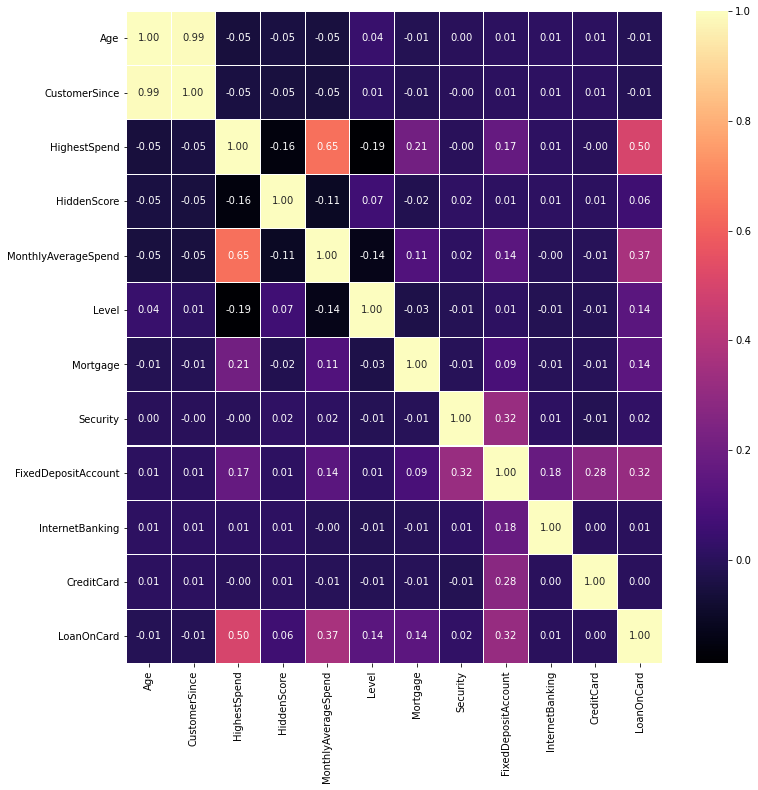

In [56]:
# The following correlation heat map suggests that the intended target attribute "LoanOnCard" is not strongly correlated with the rest of the attributes which would be a challenge for us to categorize it through analysis.

fig,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(dfres.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

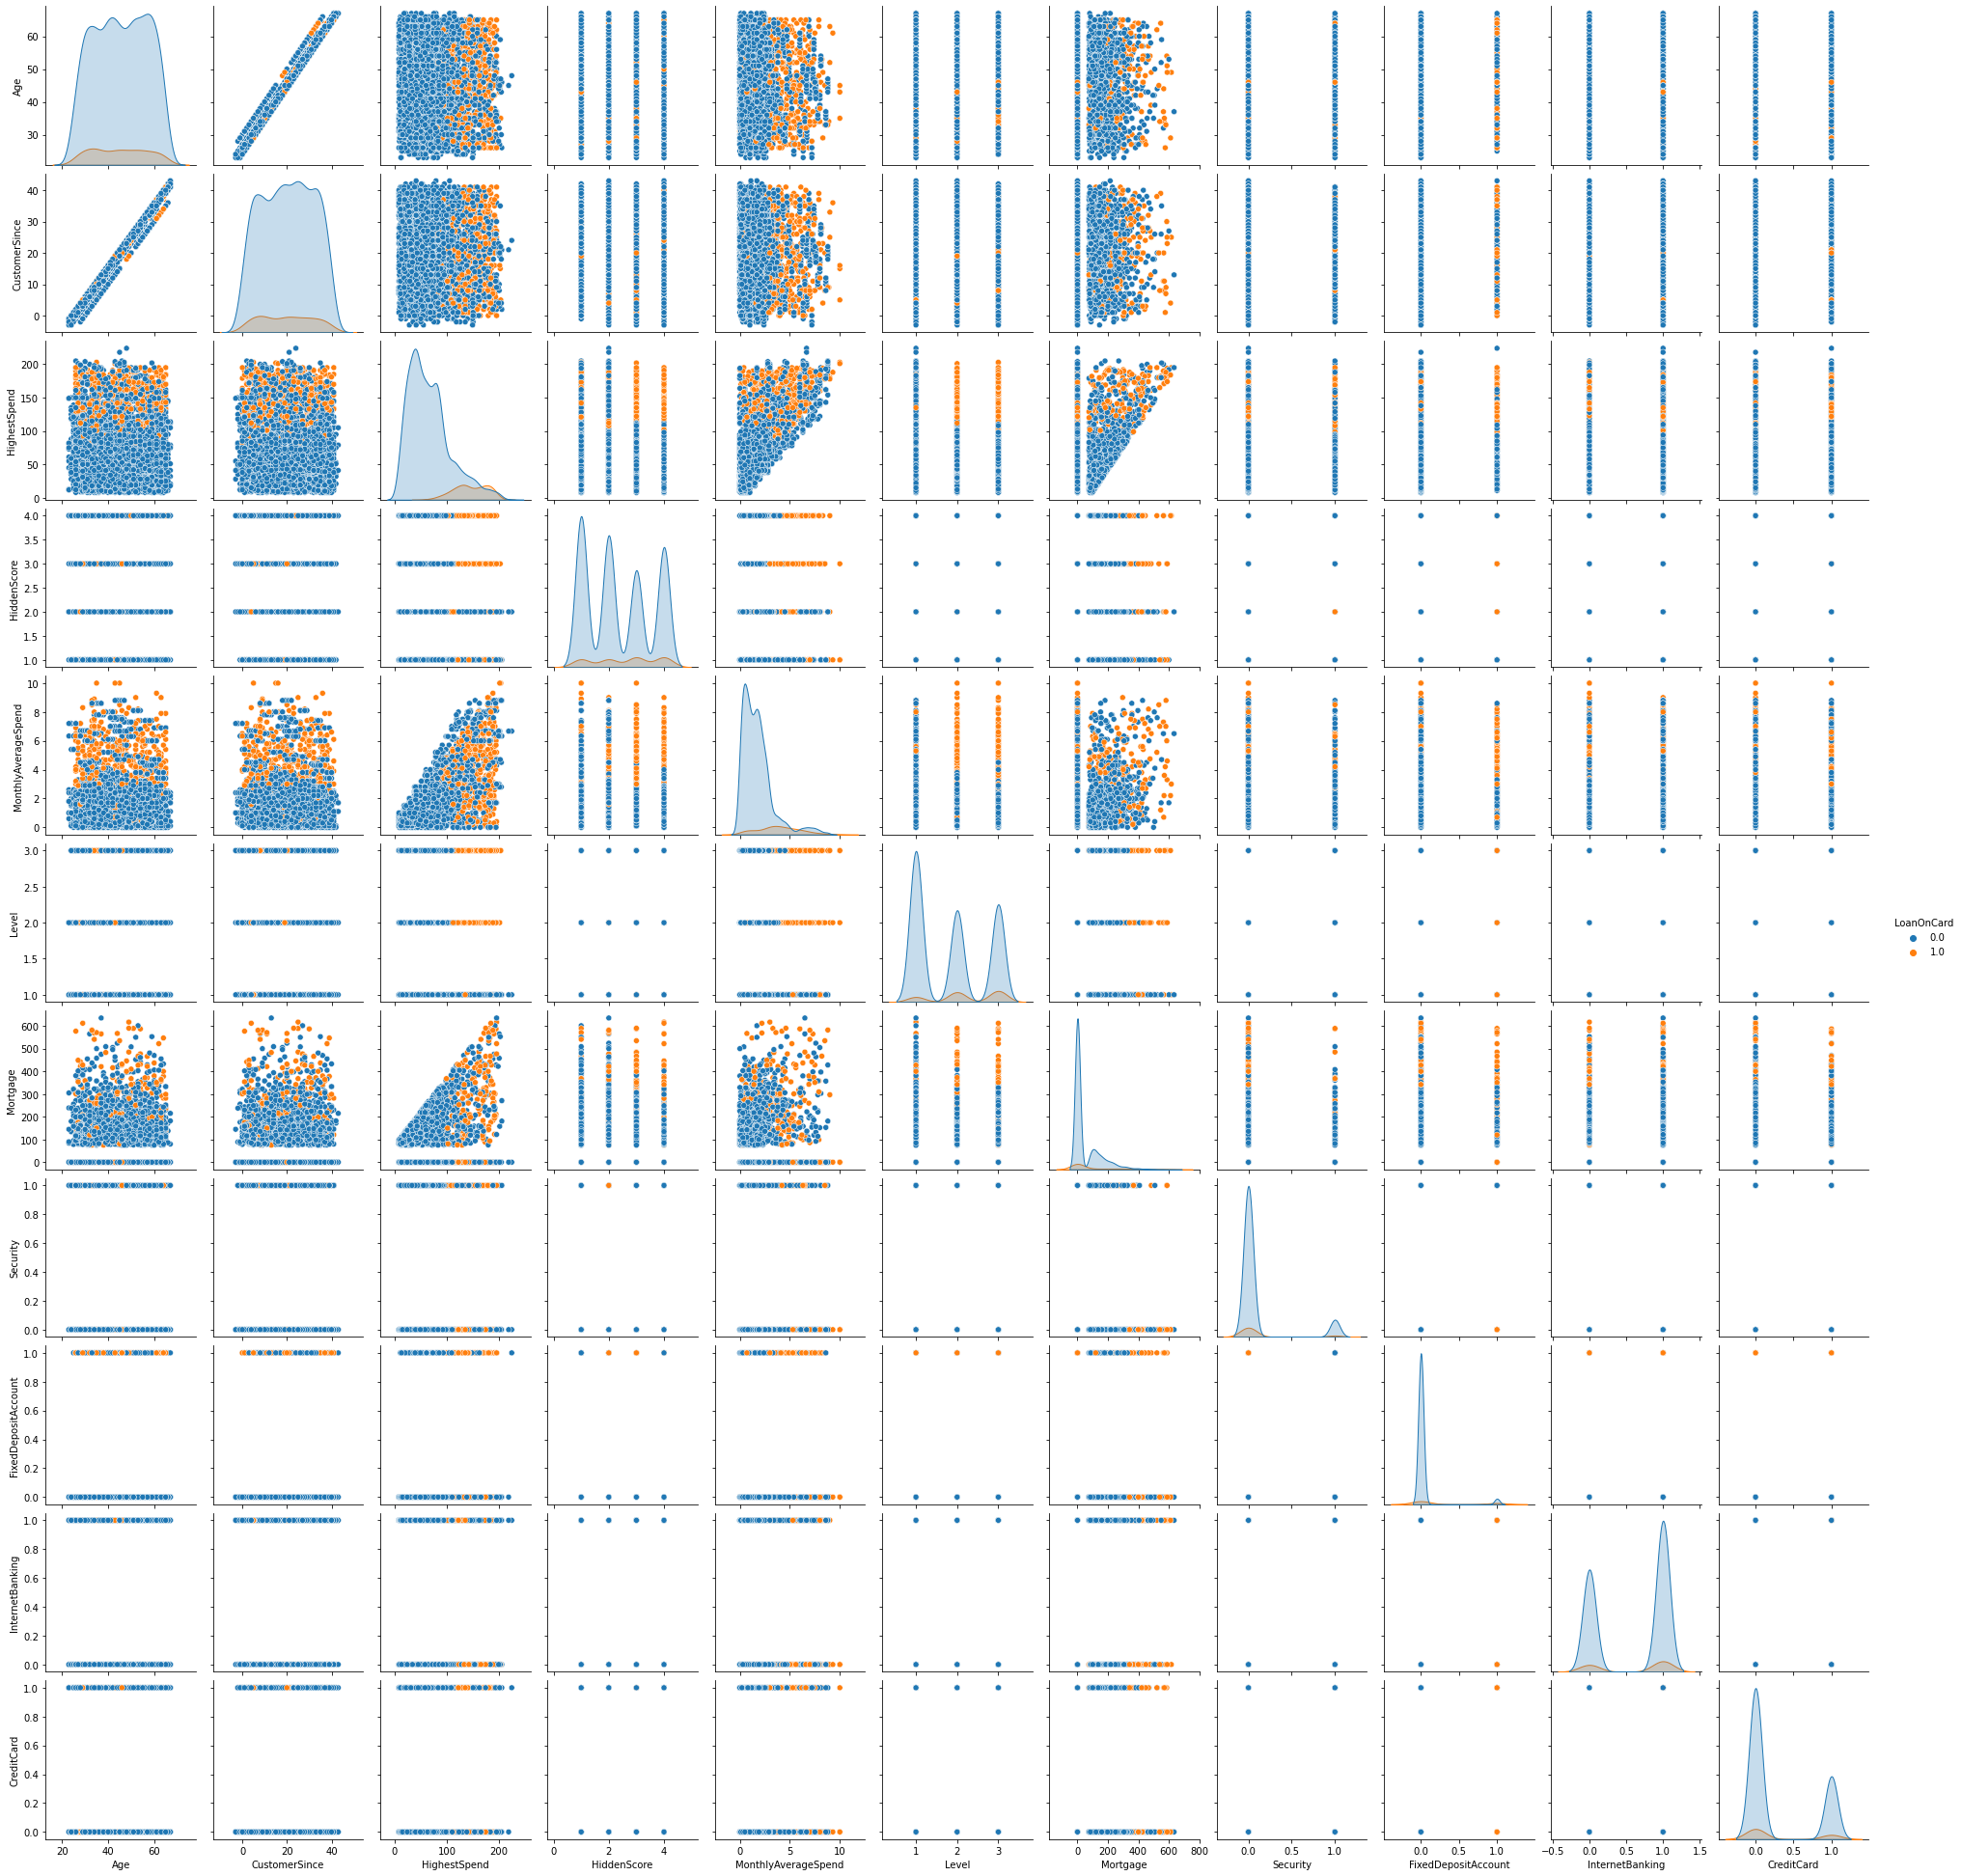

In [57]:
#Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.
sns.pairplot(dfres, diag_kind='kde', hue="LoanOnCard")

# The "LoanOnCard" attribute is not well balanced which can be inferred from the relative density of the orange(True) and the blue(False) points.
# This suggests that in terms of the amount of data for each given True/False label, we do not have uniformity on the number of data poitns collected.
# It would have been better if the number of data points collected for each type would have been nearly equal which would have contributed to the analysis in equal proportions resulting in an ubiased analysis.

### 4. Data pre-processing:

• Segregate predictors vs target attributes

• Check for target balancing and fix it if found imbalanced.

• Perform train-test split.

In [58]:
# Analysis on the dataset that includes "ZipCode" for our model does not give a higher score in terms of true positives which I have tested.
# Therefore it's futile to include "ZipCode" to the model for increasing the conversion ratio.
# Below is the code which was used to generate dummies for "ZipCode" Attribute. 

#dfres_zip = pd.get_dummies(dfres, columns=["ZipCode"])
#dfres_zip.head()

In [62]:
# Segregate predictors vs target attributes.

from sklearn.model_selection import train_test_split

X = dfres.drop(["ZipCode","LoanOnCard"], axis = 1)                  # Predictor Attributes.

Y = dfres["LoanOnCard"]                                             # Target Attribute.



#Perform train-test split.
#Train-Test split  must be done first, in order to evaluate the real performance of the model on the original "test data".

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)        #train:test=70:30
# 1 is just any random seed number

In [63]:
# Check for target balancing.

print("Training LoanOnCard True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training LoanOnCard False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))

# Approximately 1:10 which is not a good balance.

Training LoanOnCard True Values    : 327 (9.38%)
Training LoanOnCard False Values   : 3159 (90.62%)


In [64]:
# Making it a good balance.
smote = SMOTE(random_state = 1)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [65]:
#Now it's balanced.
print("Training LoanOnCard True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training LoanOnCard False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))

Training LoanOnCard True Values    : 3159 (50.00%)
Training LoanOnCard False Values   : 3159 (50.00%)


### 5. Model training, testing and tuning:

• Design and train a Logistic regression and Naive Bayes classifiers.

• Display the classification accuracies for train and test data.

• Display and explain the classification report in detail.

• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with
your comments for selecting this model.

In [66]:
#Design and train a Logistic regression classifier.

# Note: Naive Bayes Classifier is designed after the Logistic Regression Classifier.

from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.194877  0.187073  0.049977  0.229949  0.253703  0.966321  0.000551   

          7        8         9        10  intercept  
0 -2.379132  3.46836 -1.395198 -1.930772  -2.501266  


In [77]:
# Display the classification accuracies for train and test data.
model_score_train = model.score(x_train, y_train)
print("Classification accuracy for train data = "+str(model_score_train)+"\n")
model_score_test = model.score(x_test, y_test)
print("Classification accuracy for test data = "+str(model_score_test)+"\n")

Classification accuracy for train data = 0.8996517885406774

Classification accuracy for test data = 0.8701472556894244



<AxesSubplot:>

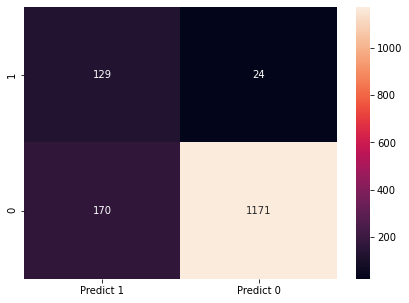

In [68]:
# Display and explain the classification report in detail.

cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt="g")

In [74]:
# Detailed Explanation of the classification report.


print("Test LoanOnCard True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test LoanOnCard False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100)+"\n")

print("Therefore we were correctly able to predict "+str((129/(129+24))*100)+" % of the positives with label '1' which is extremely important\nfor us to increase the conversion ratio to double digits.")

Test LoanOnCard True Values        : 153 (10.24%)
Test LoanOnCard False Values       : 1341 (89.76%)

Therefore we were correctly able to predict 84.31372549019608 % of the positives with label '1' which is extremely important
for us to increase the conversion ratio to double digits.


In [75]:
# Design and train a Naive Bayes classifier.

from sklearn.naive_bayes import GaussianNB          # using Gaussian algorithm from Naive Bayes

# create the model
nb_model = GaussianNB()

nb_model.fit(x_train, y_train.ravel())

GaussianNB()

In [82]:
# Display the classification accuracies for train and test data.

nb_train_predict = nb_model.predict(x_train)

from sklearn import metrics

print("Classification accuracy for train data = {0:.4f}".format(metrics.accuracy_score(y_train, nb_train_predict)))
print()

nb_test_predict = nb_model.predict(x_test)

from sklearn import metrics

print("Classification accuracy for test data = {0:.4f}".format(metrics.accuracy_score(y_test, nb_test_predict)))
print()

Classification accuracy for train data = 0.8970

Classification accuracy for test data = 0.8494



Confusion Matrix


<AxesSubplot:>

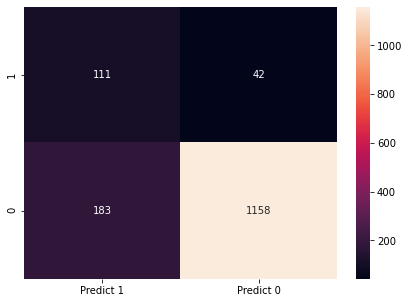

In [83]:
# Display and explain the classification report in detail.

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, nb_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt="g")

In [86]:
# Detailed Explanation of the classification report.


print("Test LoanOnCard True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test LoanOnCard False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100)+"\n")

print("But we were only able to predict "+str((111/(111+42))*100)+" % of the positives with label '1' correctly which is significantly\ninefficient than the Logistic Regression Classifier.")

Test LoanOnCard True Values        : 153 (10.24%)
Test LoanOnCard False Values       : 1341 (89.76%)

But we were only able to predict 72.54901960784314 % of the positives with label '1' correctly which is significantly
inefficient than the Logistic Regression Classifier.


All possible techniques to train the best model for the given data leads to the **Logistic Regression Model** which best predicts the positives accurately with an accuracy of 84.3 % among the positive labels, giving a total of 129 target customers among the total pool of 153.

### 6. Conclusion and improvisation:

• Write your conclusion on the results.

• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the
bank to perform a better data analysis in future.

My conclusion on the results would be that, while analyzing the data through different models I was able to segregate a handsome amount of customers which was enough of what I was asked to (Double Digit Conversion Rate).

I think the data points collected by the bank must include some more data with respect to Loans, instead the bank chose to collect data which was not closely related for anyone to want to go into debt. The bank must prepare a list of items and categorize them with the following labels: Wants/Needs with "Wants" being the things that are expensive and luxurious and "Needs" being the things that are essential yet expensive (A House) with the amount mentioned along with it. Also there is a need for the bank to go after the customers who work in the same firm or live nearby. There is a huge probability that if one such customer buys something expensive, the others around him/her won't lag behind. So the bank also needs to group customers in particular classes or some social groups with respect to their work place, profile or hierarchy in an organization which closely equates their spending pattern.